# Comparison between the types for the genders (after controlling for age)

Questions

- What are the differences between the types for the genders?
- Do we observe the same changes as globally?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Interactions between genders and types (after controlling age)
GF_SPF = results(dge,contrast= c(0,0,1,0,0,0,0,1/2,1/3,1/3), alpha=0.05, test="Wald")
GF_SPF_F = results(dge,contrast= c(0,0,1,0,0,0,0,0,1/3,1/3), alpha=0.05, test="Wald")
GF_SPF_M = results(dge,contrast= c(0,0,1,0,0,0,0,1,1/3,1/3), alpha=0.05, test="Wald")

In [7]:
F_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2',
    'GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2')
M_samples = c(
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2',
    'GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("type","age")])
to_comp = c("GF VS SPF (F)", "GF VS SPF (M)")

# Stats

In [8]:
# Stats
type_gender_stats = matrix(0, nrow=2, ncol=3)
rownames(type_gender_stats) = to_comp
colnames(type_gender_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
type_gender_stats[1,] = get_stats_padj(GF_SPF_F)
type_gender_stats[2,] = get_stats_padj(GF_SPF_M)
type_gender_stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
GF VS SPF (F),1676,685,991
GF VS SPF (M),944,382,562


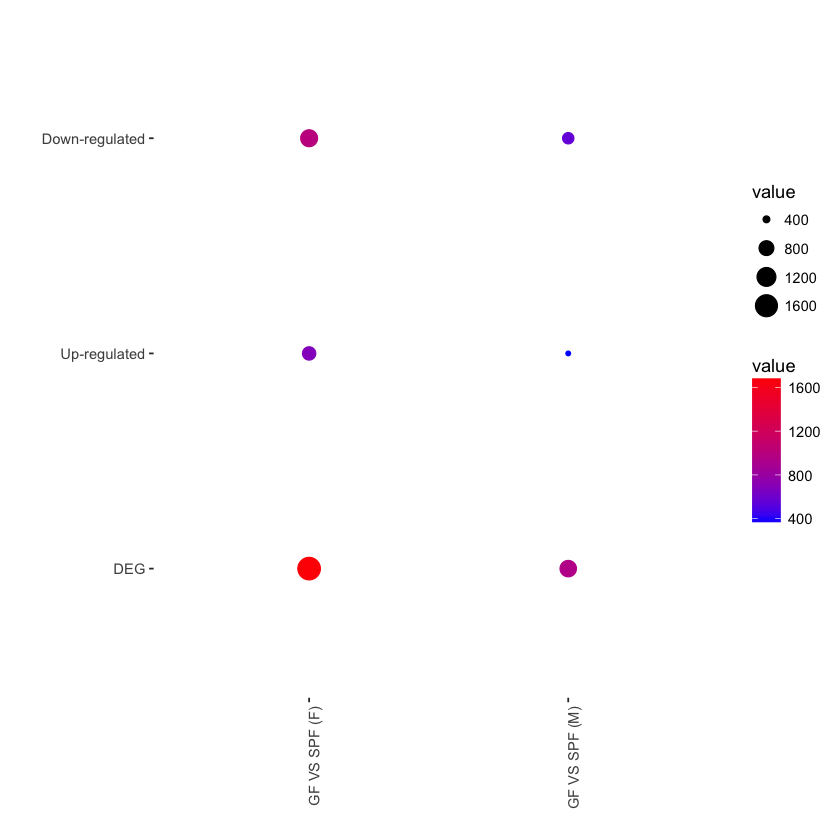

In [9]:
plot_stat_mat(type_gender_stats)

# Differentially expressed genes

In [10]:
type_gender_data = list(GF_SPF_F, GF_SPF_M)
names(type_gender_data) = to_comp
type_gender_deg = extract_diff_expr_genes(type_gender_data, "type-effect/type_gender/")

GF VS SPF (F) GF VS SPF (M) 
    0.3048926     0.3697034 


Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

# Counts

GF != SPF for F with abs(FC) > 2

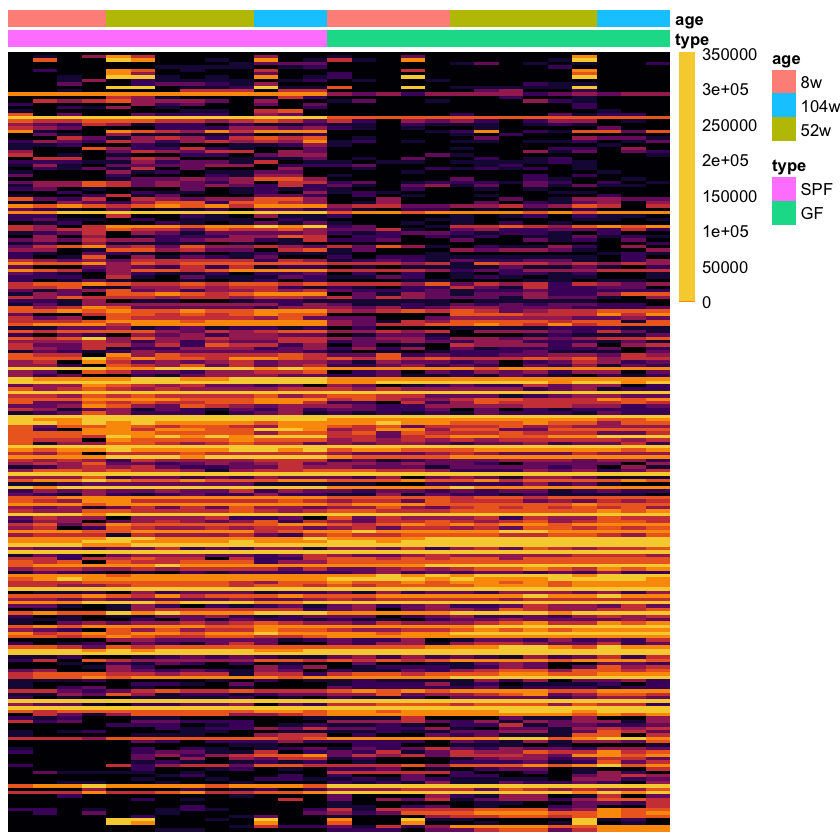

In [11]:
# GF != SPF for F with abs(FC) > 2
genes = names((sort(type_gender_deg$fc_deg[which(abs(type_gender_deg$fc_deg[,1])>1),1])))
plot_count_heatmap(genes,F_samples, annot)

GF != SPF for M with abs(FC) > 2

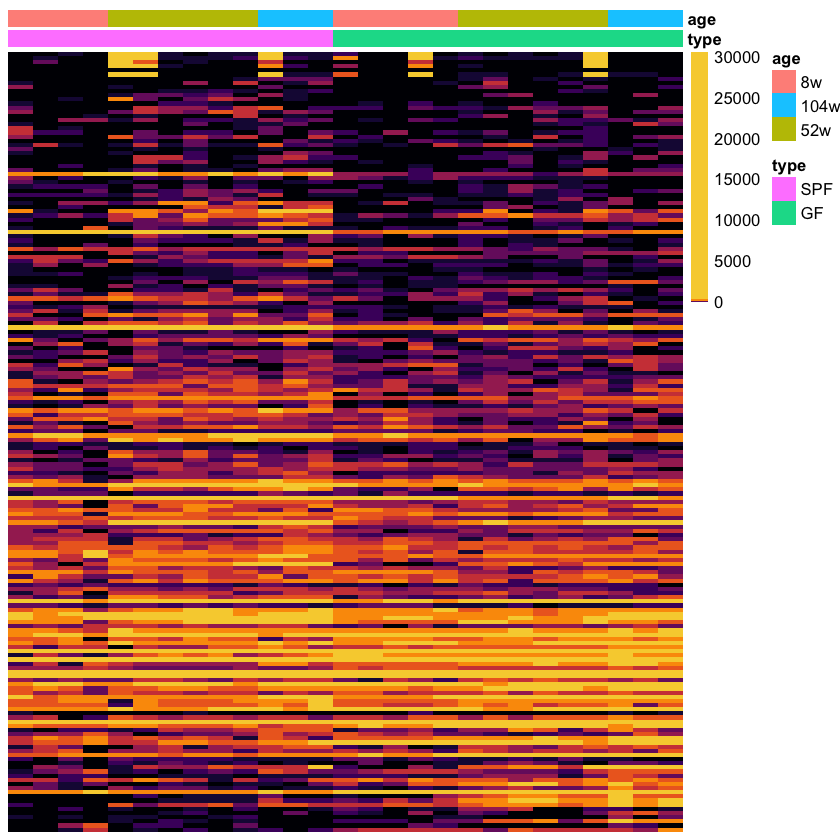

In [12]:
# GF != SPF for M with abs(FC) > 2
genes = names((sort(type_gender_deg$fc_deg[which(abs(type_gender_deg$fc_deg[,2])>1),2])))
plot_count_heatmap(genes,F_samples, annot)

# Comparison of the numbers per types

Differentially expressed genes

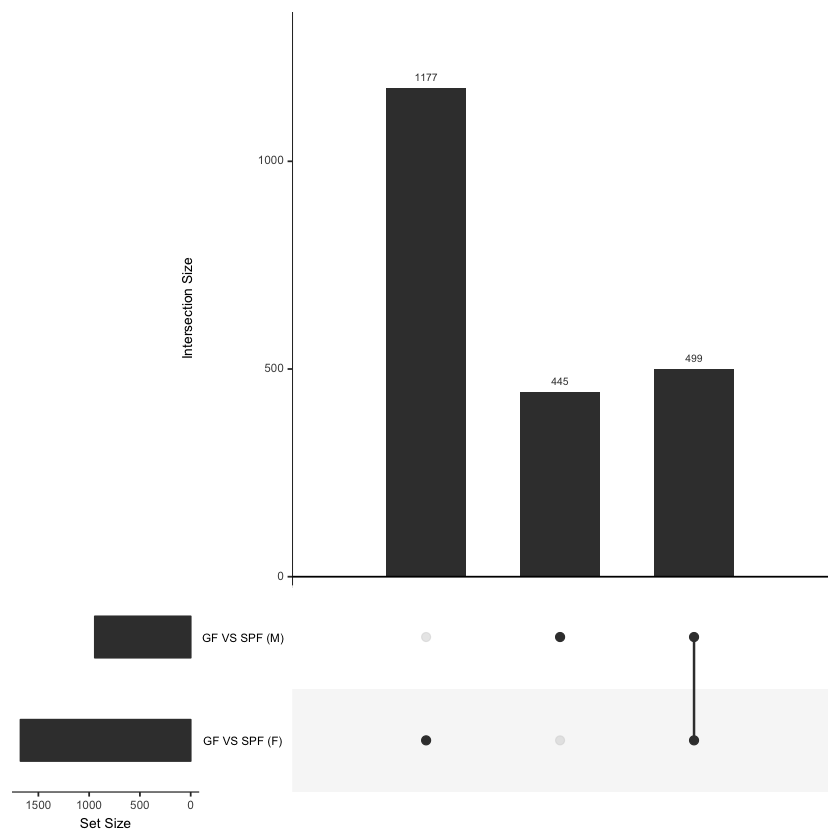

In [13]:
# Differentially expressed genes
upset(as.data.frame(type_gender_deg$deg))

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

GF vs SPF: Female, Male

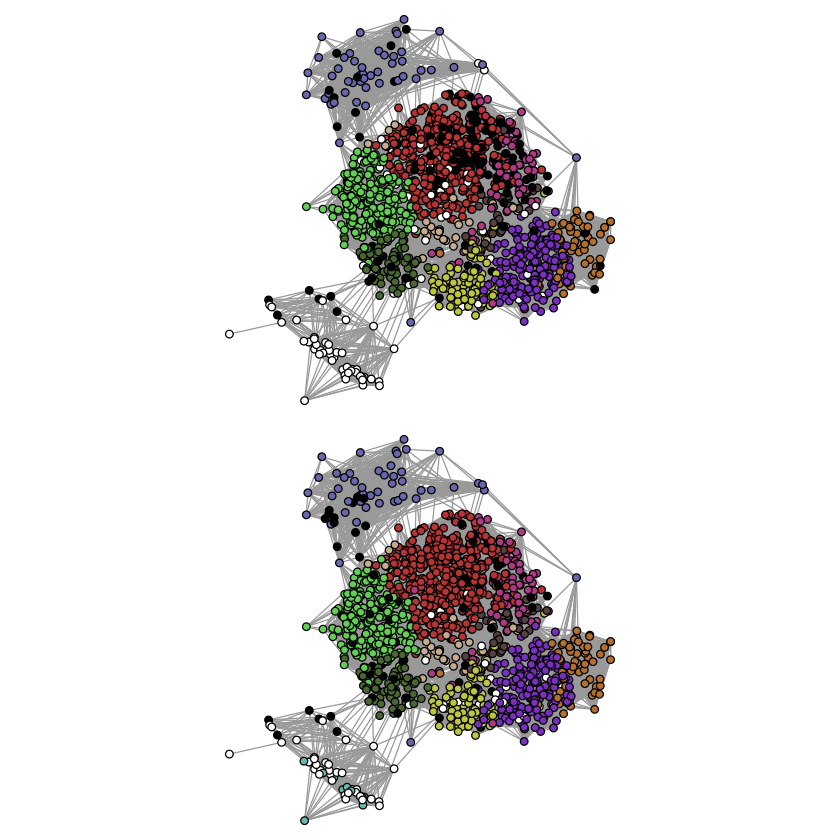

In [14]:
par(mfrow=c(2,1),mar=c(0,0,0,0))
col_GF_vs_SPF_F = get_deg_colors(type_gender_deg, "GF VS SPF (F)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_F, pal2, layout, add_legend = FALSE)
col_GF_vs_SPF_M = get_deg_colors(type_gender_deg, "GF VS SPF (M)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_M, pal2, layout, add_legend = FALSE)

# GO analysis

In [15]:
full_go_desc = type_gender_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = type_gender_deg$GO_wall[[1]][,"category"]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

Using term, id as id variables


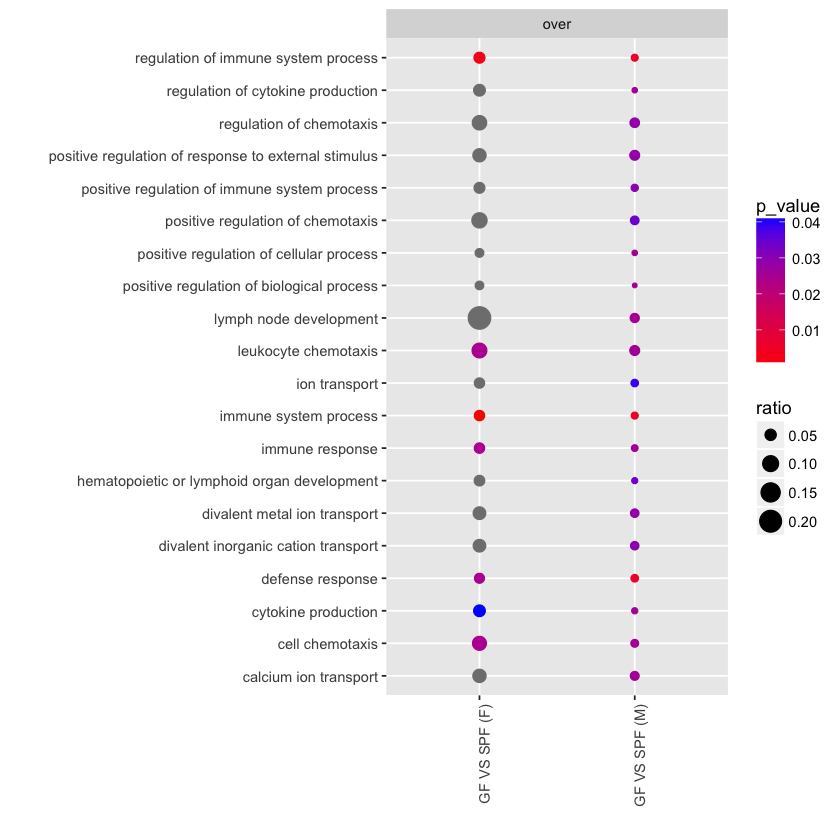

In [16]:
plot_top_go(type_gender_deg$over_represented_GO,
            type_gender_deg$under_represented_GO,
            type_gender_deg$GO_wall,
            "BP",
            20)

Network based on description similarity

In [17]:
BP_network = create_GO_network(type_gender_deg, "BP", BP_GO)

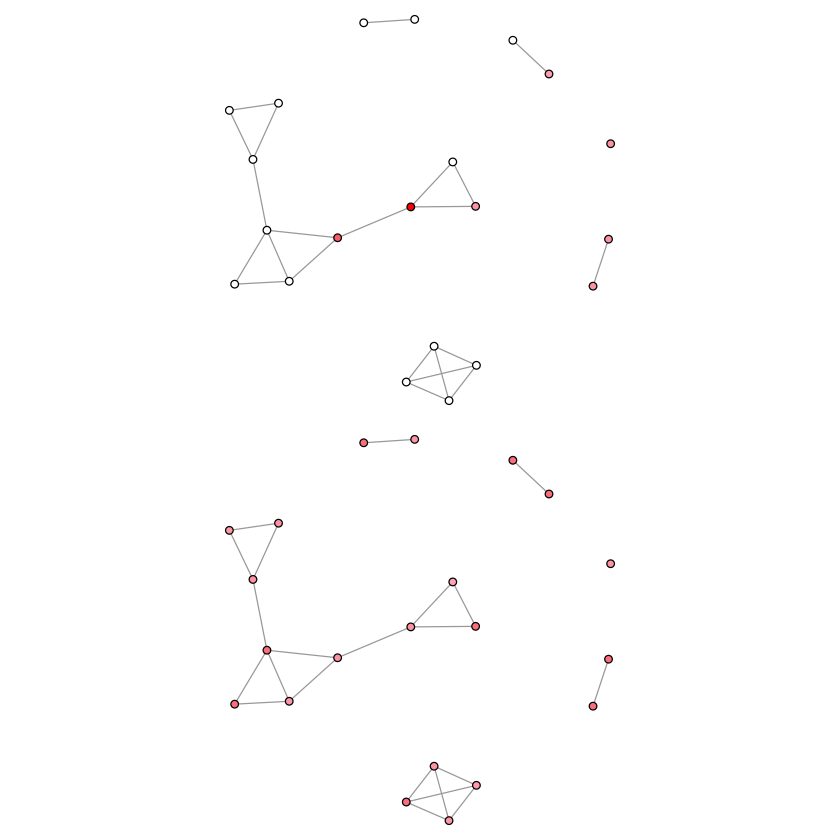

In [18]:
par(mfrow=c(2,1),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "GF VS SPF (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "GF VS SPF (M)", full_go_desc, plot_interactive = FALSE)

### GF VS SPF (F)

In [19]:
# GF VS SPF (F)
plot_GO_networks(BP_network, "GF VS SPF (F)", full_go_desc, plot_non_interactive = FALSE)

HTML widgets cannot be represented in plain text (need html)

In [20]:
col = get_GO_network_col(BP_network, "GF VS SPF (F)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender/go/GF_VS_SPF_F",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender/go/GF_VS_SPF_F.png)

GO Tree at "../results/dge/type-effect/type_gender/go/GF_VS_SPF_F.png"

### GF VS SPF (M)

In [21]:
# GF VS SPF (M)
plot_GO_networks(BP_network, "GF VS SPF (M)", full_go_desc, plot_non_interactive = FALSE)

HTML widgets cannot be represented in plain text (need html)

In [22]:
col = get_GO_network_col(BP_network, "GF VS SPF (M)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_gender/go/GF_VS_SPF_M",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_gender/go/GF_VS_SPF_M.png)

GO Tree at "../results/dge/type-effect/type_gender/go/GF_VS_SPF_M.png"

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

In [23]:
plot_top_go(type_gender_deg$over_represented_GO,
            type_gender_deg$under_represented_GO,
            type_gender_deg$GO_wall,
            "CC",
            20)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

In [24]:
plot_top_go(type_gender_deg$over_represented_GO,
            type_gender_deg$under_represented_GO,
            type_gender_deg$GO_wall,
            "MF",
            20)

# KEGG pathways

In [25]:
plot_kegg_pathways(type_gender_deg$over_represented_KEGG[,"category"],
                   type_gender_deg$fc_deg,
                   "../results/dge/type-effect/type_gender/kegg/over_repr_kegg/")

In [27]:
plot_kegg_pathways(type_gender_deg$under_represented_KEGG[,"category"],
                   type_gender_deg$fc_deg,
                   "../results/dge/type-effect/type_gender/kegg/under_repr_kegg/")

ERROR: Error in `$<-.data.frame`(`*tmp*`, "labels", value = c("", "", "", "", : replacement has 18 rows, data has 25
